In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import os
import matplotlib as mpl
import matplotlib.pyplot as ply
import scipy.stats as si
from mpl_toolkits.mplot3d import Axes3D

In [2]:
DOGC = yf.download("DOGE-USD", start="2021-04-01", end="2022-03-31")

[*********************100%***********************]  1 of 1 completed


In [3]:
DOGC.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-03-31,0.053902,0.054468,0.052269,0.053657,0.053657,653389282
2021-04-01,0.053655,0.070111,0.053644,0.061986,0.061986,5816046822
2021-04-02,0.061968,0.062249,0.057333,0.057664,0.057664,2166925111
2021-04-03,0.057658,0.059484,0.055804,0.055804,0.055804,1136931403
2021-04-04,0.055776,0.058107,0.055295,0.057404,0.057404,938035097
2021-04-05,0.057411,0.060153,0.056435,0.059696,0.059696,1513832721
2021-04-06,0.059689,0.065050,0.058094,0.064458,0.064458,2608613912
2021-04-07,0.064454,0.067299,0.057641,0.059028,0.059028,2857060849
2021-04-08,0.059036,0.061745,0.058817,0.061464,0.061464,1055257541


In [4]:
DOGC.tail(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-03-21,0.119146,0.121332,0.118306,0.119339,0.119339,439486516
2022-03-22,0.119333,0.125350,0.119014,0.122481,0.122481,610507111
2022-03-23,0.122487,0.130713,0.121361,0.129727,0.129727,998922753
2022-03-24,0.129722,0.140605,0.128455,0.136550,0.136550,2017926806
2022-03-25,0.136603,0.137275,0.128782,0.131013,0.131013,882486375
2022-03-26,0.131010,0.136495,0.129878,0.135868,0.135868,610401998
2022-03-27,0.135900,0.144858,0.135703,0.144732,0.144732,1445019558
2022-03-28,0.144725,0.152737,0.142457,0.142657,0.142657,1476875507
2022-03-29,0.142557,0.148559,0.141290,0.144470,0.144470,961074557


In [6]:
DOGC.describe()

,Open,High,Low,Close,Adj Close,Volume
count,365.000000,365.000000,365.000000,365.000000,365.000000,3.650000e+02
mean,0.228925,0.243269,0.214828,0.229240,0.229240,3.689436e+09
std,0.099102,0.112686,0.085598,0.098961,0.098961,6.838396e+09
min,0.053655,0.054468,0.052269,0.053657,0.053657,2.352770e+08
25%,0.160205,0.169145,0.152095,0.160213,0.160213,9.540753e+08
50%,0.218811,0.228267,0.204875,0.219133,0.219133,1.581065e+09
75%,0.271892,0.289390,0.256382,0.272125,0.272125,3.154333e+09
max,0.687801,0.737567,0.608168,0.684777,0.684777,6.941068e+10


In [7]:
DOGC['Adj Close'].head()

Date
2021-03-31    0.053657
2021-04-01    0.061986
2021-04-02    0.057664
2021-04-03    0.055804
2021-04-04    0.057404
Name: Adj Close, dtype: float64

<AxesSubplot:xlabel='Date'>

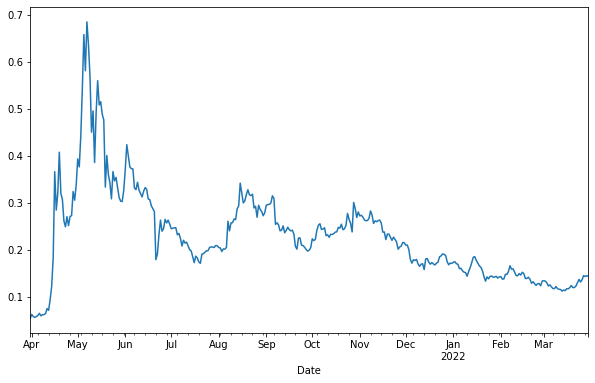

In [8]:
DOGC['Adj Close'].plot(figsize=(10,6))

In [9]:
normal_return = []
for i in range(0,len(DOGC)-1):
    adjclose_yesterday = DOGC.iloc[i]['Adj Close']
    adjclose_today = DOGC.iloc[i+1]['Adj Close']
    x = (adjclose_today - adjclose_yesterday) / adjclose_yesterday
    normal_return.append(x)
normal_return[:5]

[0.15522672672453755,
 -0.06972542015140115,
 -0.0322558304889534,
 0.028671798208944704,
 0.03992752673731635]

In [10]:
log_return = []
for i in range(0,len(DOGC)-1):
    adjclose_yesterday = DOGC.iloc[i]['Adj Close']
    adjclose_today = DOGC.iloc[i+1]['Adj Close']
    y = np.log(adjclose_today / adjclose_yesterday)
    log_return.append(y)
log_return[:5]

[0.14429662490379952,
 -0.07227548926266683,
 -0.032787514330907305,
 0.02826845379795196,
 0.03915102489560747]

In [11]:
dfnr = pd.DataFrame(normal_return, columns = ['normal']) 
nr = dfnr.mean() * len(dfnr)
nv = dfnr.std() * (len(dfnr) ** 0.5)
print('The annulized normal return is %.8f and its annulized volatility is %.8f' % (nr,nv))

The annulized normal return is 2.44475025 and its annulized volatility is 1.84199284


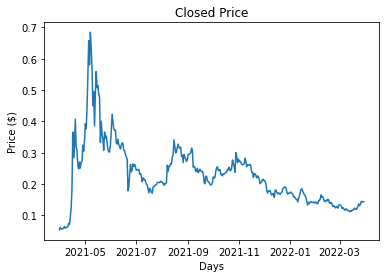

In [12]:
fig = ply.figure()
ply.plot(DOGC['Close'])
ply.xlabel('Days')
ply.ylabel('Price ($)')
ply.title('Closed Price');

In [13]:
DOGC_price = DOGC['Adj Close'][-1]
print('The spot price is', round(DOGC_price,2))

The spot price is 0.14


In [14]:
# Binomial Tree

In [15]:
S0 = 0.14               # spot price 
K = 0.20                # strike Price 
T = 30.0/365.0          # maturity period of the asset (30 days have been chosen for the maturity of the assets)
r = 0.0168              # U.S.risk free rate (the risk free rate was was 1.68 so divided by 100 gives 0.0168 (bloomberg on 01/04/2022)
sig = 1.8419            # diffusion coefficient or volatility as derived above
N = 3                   # number of periods or number of time steps  
payoff = "put"          # payoff 

In [16]:
dT = float(T) / N                             # Delta t
u = np.exp(sig * np.sqrt(dT))                 # up factor
d = 1.0 / u        

In [17]:
S = np.zeros((N + 1, N + 1))
S[0, 0] = S0
z = 1
for t in range(1, N + 1):
    for i in range(z):
        S[i, t] = S[i, t-1] * u
        S[i+1, t] = S[i, t-1] * d
    z += 1

In [18]:
S

array([[0.14      , 0.18990347, 0.25759519, 0.34941586],
       [0.        , 0.10321033, 0.14      , 0.18990347],
       [0.        , 0.        , 0.07608838, 0.10321033],
       [0.        , 0.        , 0.        , 0.05609362]])

In [19]:
a = np.exp(r * dT)    # risk free compound return
p = (a - d)/ (u - d)  # risk neutral up probability
q = 1.0 - p           # risk neutral down probability
p

0.4251100240409491

In [20]:
S_T = S[:,-1]
V = np.zeros((N + 1, N + 1))
if payoff =="call":
    V[:,-1] = np.maximum(S_T-K, 0.0)
elif payoff =="put":
    V[:,-1] = np.maximum(K-S_T, 0.0)
V

array([[0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.01009653],
       [0.        , 0.        , 0.        , 0.09678967],
       [0.        , 0.        , 0.        , 0.14390638]])

In [21]:
for j in range(N-1, -1, -1):
    for i in range(j+1):
        V[i,j] = np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1])
V

array([[0.0711871 , 0.03688988, 0.00580172, 0.        ],
       [0.        , 0.09660564, 0.05990797, 0.01009653],
       [0.        , 0.        , 0.12381959, 0.09678967],
       [0.        , 0.        , 0.        , 0.14390638]])

In [22]:
print('European ' + payoff, str( V[0,0]))

European put 0.0711870991991974


In [23]:
if payoff =="call":
    for j in range(N-1, -1, -1):
        for i in range(j+1):
            V[i,j] = np.maximum(S[i,j] - K,np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1]))
elif payoff =="put":
    for j in range(N-1, -1, -1):
        for i in range(j+1):
            V[i,j] = np.maximum(K - S[i,j],np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1]))
V

array([[0.07131532, 0.03694276, 0.00580172, 0.        ],
       [0.        , 0.09678967, 0.06      , 0.01009653],
       [0.        , 0.        , 0.12391162, 0.09678967],
       [0.        , 0.        , 0.        , 0.14390638]])

In [24]:
print('American ' + payoff, str( V[0,0]))

American put 0.07131531610783885


In [25]:
# Monte Carlo Simulation

In [26]:
def mcs_simulation_np(p):
    M = p
    I = p      ## I number of simulation
    dt = T / M ## M number of time step for each simulation
    S = np.zeros((M + 1, I))
    S[0] = S0 
    rn = np.random.standard_normal(S.shape) 
    for t in range(1, M + 1): 
        S[t] = S[t-1] * np.exp((r - sigma ** 2 / 2) * dt + sigma * np.sqrt(dt) * rn[t]) 
    return S

In [27]:
T = 30.0/365.0
r = 0.0168
sigma = 1.8419  
S0 = 0.14
K = 0.20

In [28]:
S = mcs_simulation_np(10000)

In [29]:
S = np.transpose(S)
S

array([[0.14      , 0.13929777, 0.14003324, ..., 0.13978161, 0.14048097,
        0.13948297],
       [0.14      , 0.13981317, 0.14137504, ..., 0.06866466, 0.06895397,
        0.06902498],
       [0.14      , 0.13969127, 0.14047663, ..., 0.08512725, 0.08494283,
        0.08463111],
       ...,
       [0.14      , 0.14110127, 0.14132262, ..., 0.07785102, 0.07783019,
        0.0772709 ],
       [0.14      , 0.13941882, 0.13939887, ..., 0.10271723, 0.10348504,
        0.10327025],
       [0.14      , 0.14139281, 0.14160369, ..., 0.13640314, 0.13616731,
        0.13708067]])

Text(0.5, 1.0, 'Frequency distribution of the simulated end-of-period values')

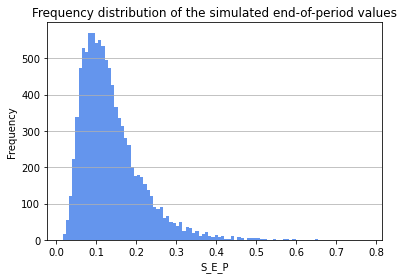

In [31]:
n, bins, patches = ply.hist(x=S[:,-1], bins='auto', color='#6495ED',alpha=1, rwidth=2.5)

ply.grid(axis='y', alpha=0.95)
ply.xlabel('S_E_P')
ply.ylabel('Frequency')
ply.title('Frequency distribution of the simulated end-of-period values')

In [32]:
p = np.mean(np.maximum(K - S[:,-1],0)) * np.exp(-r * T)
print('European put', str(p))

European put 0.07377156071593614


In [33]:
c = np.mean(np.maximum(S[:,-1] - K,0)) * np.exp(-r * T)
print('European call', str(c))

European call 0.011622677354160484


In [34]:
# Black Scholes Model

In [35]:
def EuroOption_BSM(S, K, T, r, vol, payoff):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: interest rate
    #vol: volatility of underlying asset
    #payoff: call or put
    
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        option_value = S * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        option_value = - S * si.norm.cdf(-d1, 0.0, 1.0) + K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return option_value

In [36]:
S= 0.14
K = 0.20
T = 30.0/365.0
r = 0.0168
sig = 1.8419

In [37]:
call = EuroOption_BSM(S, K, T, r, sig, 'call')
print('The BSM call price is', round(call, 2))

The BSM call price is 0.01


In [38]:
put = EuroOption_BSM(S, K, T, r, sig, 'put')
print('The BSM put price is', round(put, 2))

The BSM put price is 0.07


In [39]:
## Greeks

In [40]:
# Delta

In [41]:
def delta(S, K, T, r, q, sig, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * sig ** 2) * T) / (sig * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * sig ** 2) * T) / (sig * np.sqrt(T))
    if payoff == "call":
        delta = np.exp(- q * T) * si.norm.cdf(d1, 0.0, 1.0)
    elif payoff == "put":
        delta =  - np.exp(- q * T) * si.norm.cdf(- d1, 0.0, 1.0)
    
    return delta

In [42]:
delta (0.14, 0.20, 30.0/365.0, 0.0168, 0, 1.8419, 'call') 

0.3413411616461517

In [43]:
delta(0.14, 0.20, 30.0/365.0, 0.0168, 0, 1.8419, 'put') 

-0.6586588383538483

In [44]:
S = np.linspace(0.16, 0.26, 40)
T = np.linspace(0.5, 2, 40)
Delta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Delta[i,j] = delta(S[j], 0.20, T[i], 0.0168, 0.00, 1.8419, 'put')

/var/folders/b9/tqcs50gn1918ytynwg3k50840000gn/T/ipykernel_63253/1507148614.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


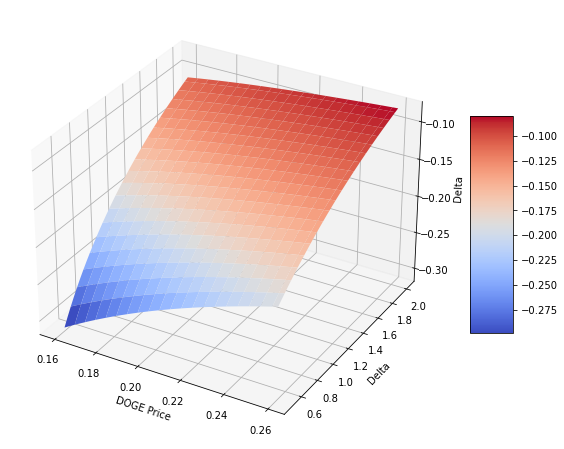

In [45]:
fig = ply.figure(figsize=(10, 8))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Delta, rstride=2, cstride=2, cmap=ply.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('DOGE Price')
ax.set_ylabel('Delta')
ax.set_zlabel('Delta')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [46]:
# Gamma

In [47]:
def gamma(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = np.exp(- r * T) * si.norm.pdf(d1, 0.0, 1.0) / (vol * S * np.sqrt(T))
    
    return gamma

In [48]:
gamma(0.14, 0.20, 30.0/365.0, 0.0168, 0, 1.8419, 'put')

4.956921222156484

In [49]:
gamma(0.14, 0.20, 30.0/365.0, 0.0168, 0, 1.8419, 'call')

4.956921222156484

In [50]:
S = np.linspace(0.16, 0.26,40)
T = np.linspace(0.5, 2, 40)
Gamma = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Gamma[i,j] = gamma(S[j], 0.20, T[i], 0.0168, 0.0, 1.8419, 'put')

/var/folders/b9/tqcs50gn1918ytynwg3k50840000gn/T/ipykernel_63253/4209038549.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


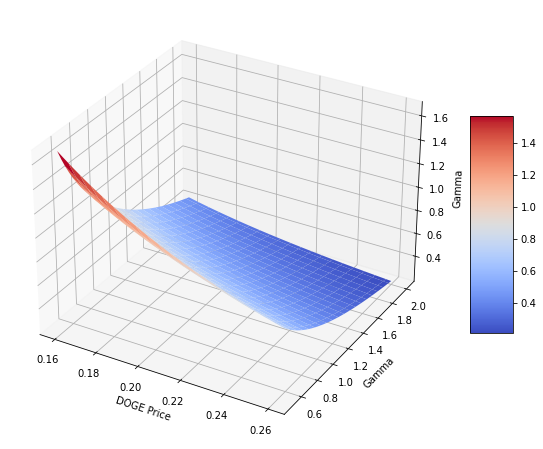

In [51]:
fig = ply.figure(figsize=(10, 8))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Gamma, rstride=2, cstride=2, cmap=ply.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('DOGE Price')
ax.set_ylabel('Gamma')
ax.set_zlabel('Gamma')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [52]:
# Speed

In [53]:
def speed(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    speed = - np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / ((vol **2) * (S**2) * np.sqrt(T)) * (d1 + vol * np.sqrt(T))
    
    return speed

In [54]:
S = np.linspace(0.16, 0.26, 40)
T = np.linspace(0.5, 2, 40)
Speed = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Speed[i,j] = speed(S[j], 0.20, T[i], 0.0168, 0, 1.8419, 'put')

/var/folders/b9/tqcs50gn1918ytynwg3k50840000gn/T/ipykernel_63253/1584809240.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


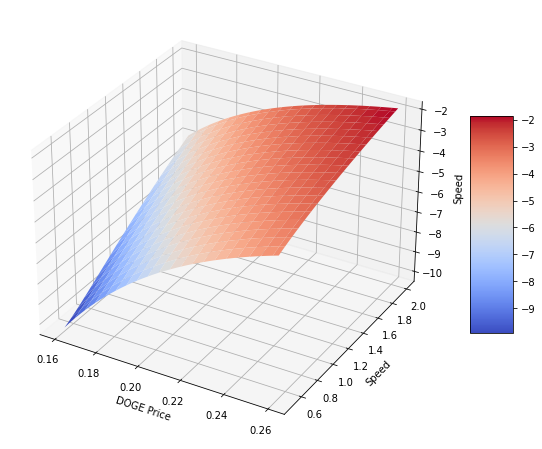

In [55]:
fig = ply.figure(figsize=(10, 8))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Speed, rstride=2, cstride=2, cmap=ply.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('DOGE Price')
ax.set_ylabel('Speed')
ax.set_zlabel('Speed')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [56]:
speed(0.14, 0.20, 30.0/365.0, 0.0168, 0, 1.8419, 'put')

-2.295506810850501

In [57]:
speed(0.14, 0.20, 30.0/365.0, 0.0168, 0, 1.8419, 'call')

-2.295506810850501

In [58]:
# Theta 

In [59]:
def theta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        theta = vol * S * np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        theta = vol * S * np.exp(- q * T) * si.norm.pdf(-d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return theta

In [60]:
S = np.linspace(0.16, 0.26, 40)
T = np.linspace(0.5, 2, 40)
Theta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Theta[i,j] = theta(S[j], 0.20, T[i], 0.0168, 0, 1.8419, 'put')

In [61]:
theta(0.14, 0.20, 30.0/365.0, 0.0168, 0, 1.8419, 'put')

0.16780278796476075

/var/folders/b9/tqcs50gn1918ytynwg3k50840000gn/T/ipykernel_63253/2673921214.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


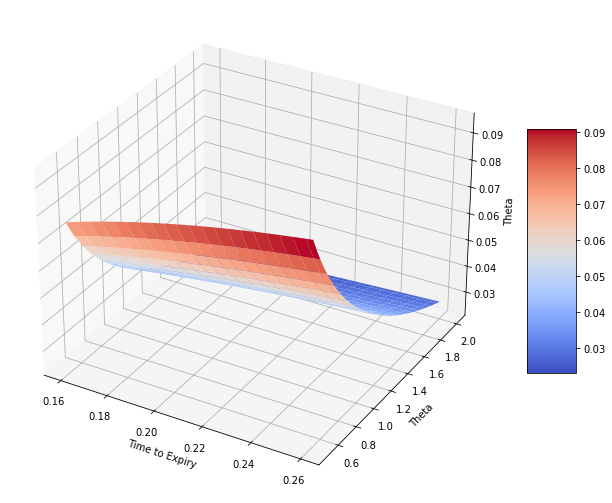

In [62]:
fig = ply.figure(figsize=(11, 9))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Theta, rstride=2, cstride=2, cmap=ply.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Time to Expiry')
ax.set_ylabel('Theta')
ax.set_zlabel('Theta')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [63]:
def rho(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        rho =  K * T * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        rho = - K * T * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return rho

In [64]:
rho(0.14, 0.20, 30.0/365.0, 0.0168, 0, 1.8419, 'put')

-0.013552537112169307

In [65]:
rho(0.14, 0.20, 30.0/365.0, 0.0168, 0, 1.8419, 'call')

0.0028631362737725945

In [66]:
S = np.linspace(0.16, 0.26, 40)
T = np.linspace(0.5, 2, 40)
Rho = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Rho[i,j] = rho(S[j], 0.20, T[i], 0.0168, 0, 1.8419, 'put')

/var/folders/b9/tqcs50gn1918ytynwg3k50840000gn/T/ipykernel_63253/2621862101.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


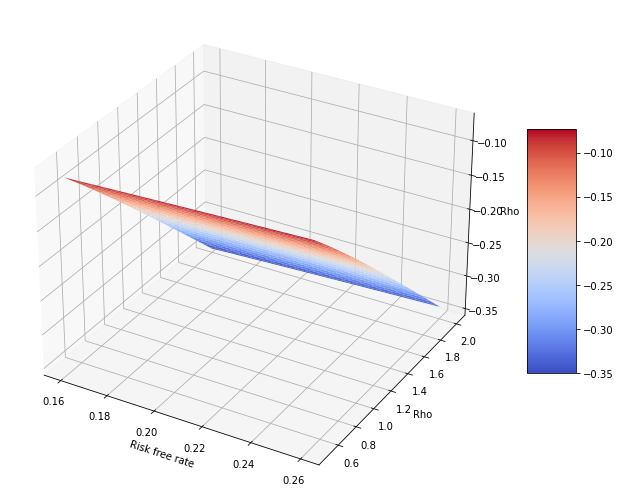

In [67]:
fig = ply.figure(figsize=(11, 9))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Rho, rstride=2, cstride=2, cmap=ply.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Risk free rate')
ax.set_ylabel('Rho')
ax.set_zlabel('Rho')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [68]:
#Vega

In [69]:
def vega(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    vega = S * np.sqrt(T) * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0)
    
    return vega

In [70]:
vega(0.14, 0.20, 30.0/365.0, 0.0168, 0, 1.8419, 'put')

0.014728625165559386

In [71]:
vega(0.14, 0.20, 30.0/365.0, 0.0168, 0, 1.8419, 'call')

0.014728625165559386

In [79]:
vol = np.linspace(0.1,0.4,13)
Vega = np.zeros((len(vol),1))
for i in range(len(vol)):
    Vega [i] = vega(100, 100, 1, 0.05, 0.03, vol[i], 'call')

/var/folders/b9/tqcs50gn1918ytynwg3k50840000gn/T/ipykernel_63253/2886638731.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


NameError: name 'maplotpy' is not defined

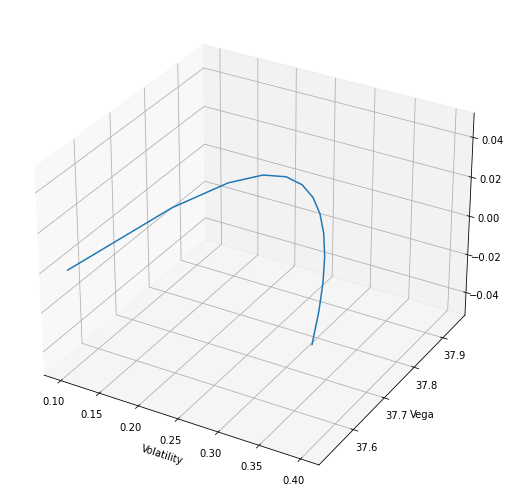

In [80]:
fig = ply.figure(figsize=(11, 9))
ax = fig.gca(projection='3d')
ply.plot(vol, Vega, '-')
ply.grid()
ply.xlabel('Volatility')
ply.ylabel('Vega')
maplotpy.title('Vega')
maplotpy.legend(['Vega for Put'])